# Classification Models

## read the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/healthcare-dataset-stroke-data.csv', delimiter = ",")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
#untuk melihat statistical details
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## check persentase target class

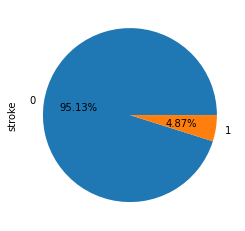

In [ ]:
import matplotlib.pyplot as plt

data = df['stroke'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

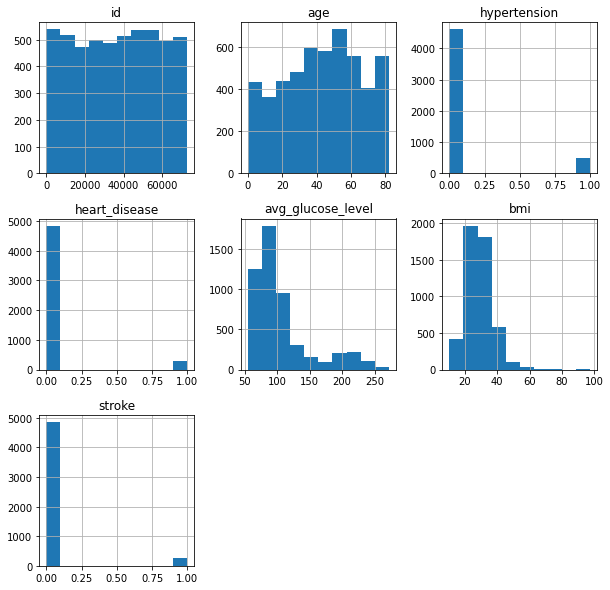

In [ ]:
# check histogram for continuous columns
df.hist(figsize=(10,10))
plt.show()

In [ ]:
#check correlation coef
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## check missing values

In [ ]:
df.isnull().sum()



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## check categorical attributes

In [ ]:
df_X = df.drop(['id',	'stroke'],axis=1)
df_y = df[['stroke']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


## Data preprocessing


In [ ]:
# import library yg dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

# data preprocessing dimulai
# membuat X and y. X untuk input variable, y untuk target class
df_X = df.drop(['id',	'stroke'],axis=1)
df_y = df[['stroke']]

#label encoding for y. 
#merubah nilai yg ada di y menjadi 0 atau 1.
#sebenarnya ini tidak diperlukan karena nilai y di dataset sudah 0 atau 1
le = LabelEncoder()
df_y= le.fit_transform(df_y['stroke'])

#imputation. kita isi nilai kosong yg di kolom bmi dengan nilai median nya (atau bisa pakai cara lain)
df_X['bmi'].fillna(df_X['bmi'].median(), inplace=True)

#categorical encoding
#merubah categorical value menjadi numerical value
#bisa pakai label encoding, ordinal atau one hot encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

#menyimpan X dan y menjadi numpy arrays
X = df_X.astype(float).values
y = df_y.astype(float)

#hold-out method, dibagi menjadi training dan testing set. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing selesai



In [ ]:
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,  28.1 ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [ ]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train

array([[ 1.18418048, -1.7467638 , -0.31719928, ..., -0.340693  ,
        -1.64591683, -1.29622579],
       [ 1.18418048, -0.63635252, -0.31719928, ...,  2.26654137,
        -0.78843307,  1.52066342],
       [ 1.18418048,  0.02989425,  3.15259225, ..., -0.32155489,
        -0.30772248,  0.58170035],
       ...,
       [-0.84446587, -1.87290652, -0.31719928, ..., -0.18803315,
        -1.43804198, -1.29622579],
       [ 1.18418048,  1.62888649, -0.31719928, ...,  2.01062472,
         0.27692553, -0.35726272],
       [-0.84446587,  0.11872715, -0.31719928, ..., -0.12416526,
         2.78441591,  1.52066342]])

In [ ]:
X_test

array([[ 1.18418048, -0.54751962, -0.31719928, ..., -0.90971812,
        -0.76244872, -1.29622579],
       [ 1.18418048, -0.14777156, -0.31719928, ..., -0.89992653,
        -0.07386327,  0.58170035],
       [-0.84446587, -1.569098  , -0.31719928, ..., -0.69675096,
        -0.82740961, -1.29622579],
       ...,
       [ 1.18418048, -0.05893866, -0.31719928, ..., -0.26569829,
        -0.21677723,  0.58170035],
       [-0.84446587,  0.60730811, -0.31719928, ..., -0.80846414,
        -0.63252693, -1.29622579],
       [-0.84446587,  0.74055746, -0.31719928, ..., -0.72746095,
        -0.46362862,  0.58170035]])

# Logistic Regression


Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


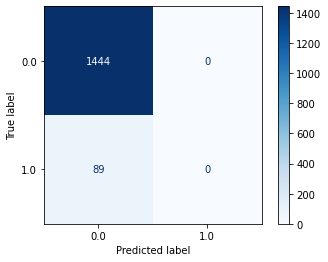

In [ ]:
#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## melihat coefficients-nya

In [ ]:
model.coef_

array([[-0.01926181,  1.5514967 ,  0.10348619,  0.07940788, -0.18090425,
        -0.06958962,  0.05980281,  0.1976799 , -0.03397277,  0.02276299]])

## melihat intercept-nya


In [ ]:
model.intercept_

array([-4.04479423])

# K Nearest Neighbour

Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


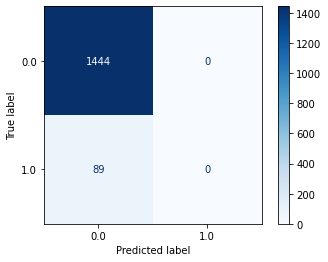

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Decision Tree



Accuracy  0.9001956947162426
Precision  0.5370011732373314
Recall  0.5358282237231162
Confusion matrix  [[1369   75]
 [  78   11]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


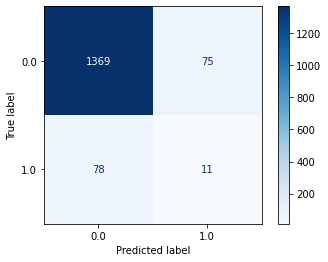

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Random Forest


Accuracy  0.9412915851272016
Precision  0.47095300261096606
Recall  0.49965373961218834
Confusion matrix  [[1443    1]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


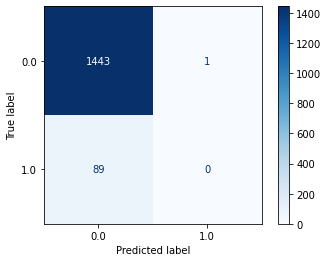

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# AdaBoost


Accuracy  0.9386823222439661
Precision  0.5825678040244969
Recall  0.5088121323414984
Confusion matrix  [[1437    7]
 [  87    2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


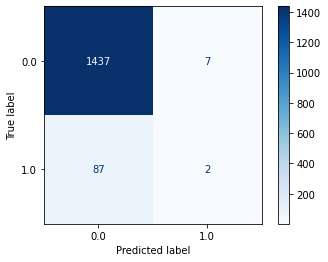

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()